# Applied Machine Learning: Assignment \#13

### Sheetal Parikh
EN.605.631.81<br>
May 3, 2021
***
***

## Problem 1

*Pre-process a single file using 20 frequency bins (i.e. M), and 2000 sampling frequency (controls the number of data points). cat_1.wav file (signal) will generate 20 features, and 44 data points. Note that 2000Hz sampling frequency in fact would ignore frequencies higher than 1000Hz and we assume cats and dogs sounds are less than that range. Changing that limit to 3k, and 4k are suggested, but then this will increase the number of data points to be processed. Display the spectrogram in your notebook.*



In [1]:
# Load libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sys

from random import shuffle

from sklearn import datasets, svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import  cross_validate, cross_val_score, GridSearchCV, KFold


import torch
import torch.nn as nn

from sklearn.model_selection import GridSearchCV

import os 

# change the current directory 
# to specified directory 
#os.chdir(r"C:\Users\Sheetal\Documents\Sheetal\datasets") 

print(f'PyTorch version= {torch.__version__}')

PyTorch version= 1.6.0


In [2]:
#was getting an error that there wass no module librosa so had to install librosa directly into the notebook as outlined 
#by this stackoverflow post

#https://stackoverflow.com/questions/59650876/issue-on-import-librosa-command-on-jupyter-notebook

#!{sys.executable} -m pip install librosa

In [3]:
import librosa
import librosa.display

In [4]:
#os.getcwd()

In [5]:
import scipy.io.wavfile as sci_wav

SAMPLING_FRQ = 2000
SAMPLING_FRQ2 = 3000
SAMPLING_FRQ3 = 4000

ROOT_DIR = 'C:/Users/Sheetal/Documents/Sheetal/datasets/sounds/cats_dogs/'

def read_wav(files):
    if not isinstance(files, list):
        files = [files]
    return [sci_wav.read(ROOT_DIR + f)[1] for f in files]

# results to current directory saved as output 
data_path = os.listdir(ROOT_DIR)

#checking number of recordings
print(len(data_path)) 
print("")
#check first few files
print(data_path[:20]) 
print("")
data = read_wav(data_path)

277

['cat_1.wav', 'cat_10.wav', 'cat_100.wav', 'cat_101.wav', 'cat_102.wav', 'cat_103.wav', 'cat_105.wav', 'cat_106.wav', 'cat_107.wav', 'cat_108.wav', 'cat_109.wav', 'cat_11.wav', 'cat_110.wav', 'cat_112.wav', 'cat_113.wav', 'cat_114.wav', 'cat_115.wav', 'cat_116.wav', 'cat_117.wav', 'cat_118.wav']



We can see that there are 277 recordings in the directory.  We also can see names of the first few files.  We will use the first file, cat_1.wav for this problem.

In [6]:
#reading first wav file - cat_1
print(read_wav('cat_1.wav'))

[array([ 124,  107,    7, ..., -545, -494, -529], dtype=int16)]


Spectograph of cat_1.wav file with sample frequency of 2000:


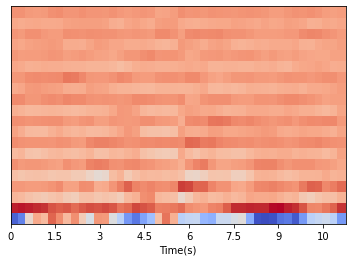

Waveform of cat_1.wav file with sample frequency of 2000:


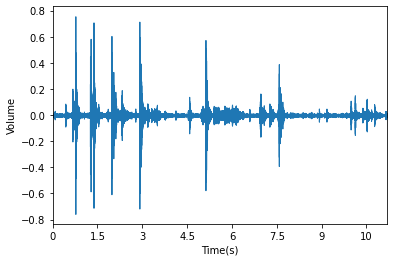

In [7]:
#using code from office hours
M = 20
x, fs = librosa.load(ROOT_DIR+'cat_1.wav', sr=SAMPLING_FRQ)
mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc=M)

librosa.display.specshow(mfccs, sr=fs, x_axis='time')
print("Spectograph of cat_1.wav file with sample frequency of 2000:")
plt.xlabel('Time(s)')
plt.show()

librosa.display.waveplot(y=x, sr=fs)
print("Waveform of cat_1.wav file with sample frequency of 2000:")
plt.xlabel('Time(s)')
plt.ylabel('Volume')
plt.show()

In [8]:
import IPython.display as ipd
#listen to audio when using sample frequency of 2000
ipd.Audio(x, rate=fs)

Spectograph of cat_1.wav file with sample frequency of 3000:


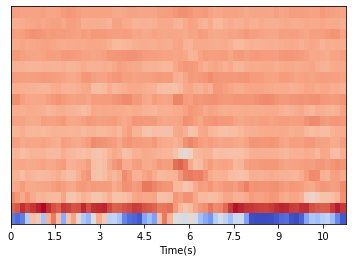

Waveform of cat_1.wav file with sample frequency of 3000:


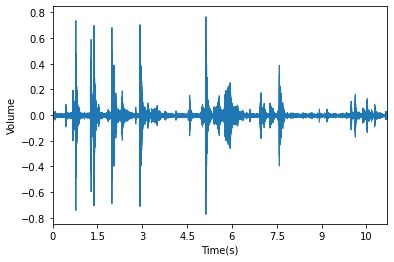

In [9]:
SAMPLING_FRQ2 = 3000

x2, fs2 = librosa.load(ROOT_DIR+'cat_1.wav', sr=SAMPLING_FRQ2)
mfccs2 = librosa.feature.mfcc(x2, sr=fs2, n_mfcc=M)

librosa.display.specshow(mfccs2, sr=fs2, x_axis='time')
print("Spectograph of cat_1.wav file with sample frequency of 3000:")
plt.xlabel('Time(s)')
plt.show()

librosa.display.waveplot(y=x2, sr=fs2)
print("Waveform of cat_1.wav file with sample frequency of 3000:")
plt.xlabel('Time(s)')
plt.ylabel('Volume')
plt.show()

In [10]:
#listen to audio when using sample frequency of 3000
ipd.Audio(x2, rate=fs2)

Spectograph of cat_1.wav file with sample frequency of 4000:


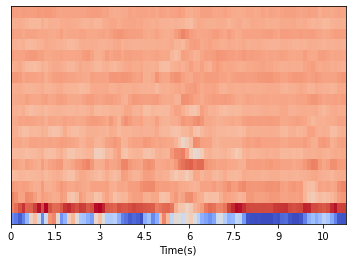

Waveform of cat_1.wav file with sample frequency of 4000:


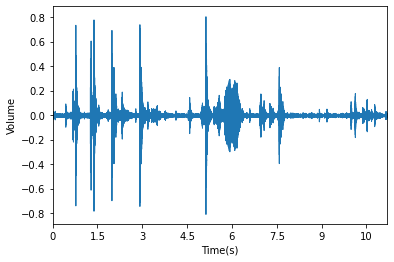

In [11]:
SAMPLING_FRQ3 = 4000

x3, fs3 = librosa.load(ROOT_DIR+'cat_1.wav', sr=SAMPLING_FRQ3)
mfccs3 = librosa.feature.mfcc(x3, sr=fs3, n_mfcc=M)

librosa.display.specshow(mfccs3, sr=fs3, x_axis='time')
print("Spectograph of cat_1.wav file with sample frequency of 4000:")
plt.xlabel('Time(s)')
plt.show()

librosa.display.waveplot(y=x3, sr=fs3)
print("Waveform of cat_1.wav file with sample frequency of 4000:")
plt.xlabel('Time(s)')
plt.ylabel('Volume')
plt.show()

In [12]:
#listen to audio when using sample frequency of 4000
ipd.Audio(x3, rate=fs3)

In all the waveforms we can see the amplitude of the cat's meow over time.  I think the waveform and spectograph eliminate a little noise as a sample frequency is used. With a sample frequency of 4000 we are able to hear the cat's meow more clearly between about the 4.5 to 6 second mark.

In [13]:
#MFCCs when sample frequency 2000
mfccs.shape

(20, 44)

In [14]:
#MFCCs when sample frequency 3000
mfccs2.shape

(20, 66)

In [15]:
#MFCCs when sample frequency 4000
mfccs3.shape

(20, 88)

We can see above how the number of features increases with a higher frequency. When using a sample frequency of 2000 we get 20 features and 44 data points while when we use a sample frequency of 4000 we get 88 data points.  I will be using a sample frequency of 4000 going forward since it produced the clearest audio. 

***
## Problem 2
*For each wav file, you will have multiple data points, as generated by the librosa.feature.mfcc. Generate the X and y matrices for supervised learning. Apply your favorite classifier and comment about your results. (Hint: Expect 80-90% 10-fold CV accuracy, and N, M = 7634, 20)*

In [16]:
#creating dataframe to check balance
df = pd.DataFrame()
df['Path'] = data_path
is_cat = []
for path in data_path:
    if path[:3] == "cat":
        is_cat.append("cat")
    else:
        is_cat.append("dog")
df['Label'] = is_cat
print (df.head(250))

                   Path Label
0             cat_1.wav   cat
1            cat_10.wav   cat
2           cat_100.wav   cat
3           cat_101.wav   cat
4           cat_102.wav   cat
..                  ...   ...
245  dog_barking_70.wav   dog
246  dog_barking_71.wav   dog
247  dog_barking_72.wav   dog
248  dog_barking_73.wav   dog
249  dog_barking_74.wav   dog

[250 rows x 2 columns]


In [17]:
#was getting an error that the seaborn module didn't exist
#!{sys.executable} -m pip install seaborn
import seaborn as sns

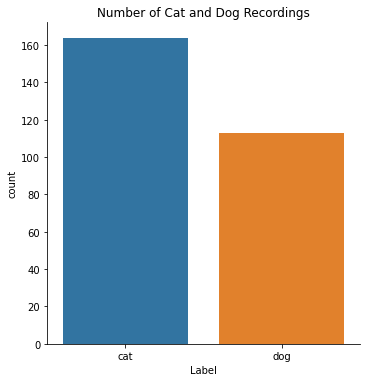

Number of cat recordings: 164
Number of dog recordings: 113
Total recordings: 277


In [18]:
cat_df = df[df.Label == 'cat']
dog_df = df[df.Label == 'dog']
num_cats = len(cat_df)
num_dogs = len(dog_df)

sns.catplot(x="Label", kind="count", data=df)
plt.title('Number of Cat and Dog Recordings')
plt.show()

print(f'Number of cat recordings: {num_cats}')
print(f'Number of dog recordings: {num_dogs}')
print(f'Total recordings: {num_cats + num_dogs}')

In [19]:
#Finding total lengths, mean lengths, of standard deviation of lengths of all recordings
# find length of each recording

length = []
for x in range(len(data_path)):
    length.append(len(data[x]))
df['Length'] = length

#length of cat and dog recordings
cat_df = df[df.Label == 'cat']
dog_df = df[df.Label == 'dog']
num_cats = len(cat_df)
num_dogs = len(dog_df)
total_length_cat = cat_df.Length.sum()
total_length_dog = dog_df.Length.sum()

mean_length = df.Length.mean()
std_length = df.Length.std()


print(f'Total Length cat recordings: {total_length_cat}')
print(f'Total Length dog recordings: {total_length_dog}')
print (f'Mean length of all recordings: {mean_length}')
print (f'Standard Deviation of length of all recordings: {std_length}')

Total Length cat recordings: 21182367
Total Length dog recordings: 9575013
Mean length of all recordings: 111037.47292418772
Standard Deviation of length of all recordings: 73379.67239581297


We can see that the dataset is not balanced. We have many more cat recordings and longer cat recordings. There is also a very large standard deviation in the length of all recording. We can use StandardScalar after generating the X and y matrices prior to applying any classifiers.

In [20]:
#directory = ROOT_DIR

#for filename in os.listdir(directory):
#    print(os.path.join(directory, filename))

In [21]:
%%time
#code from office hours

directory = [f for f in os.listdir(ROOT_DIR) if f.lower().endswith('.wav')]

mfccs_all = []

for file in directory:
    #using sample frequency of 4000
    #x, fs = librosa.load(os.path.join(ROOT_DIR,file), sr=SAMPLING_FRQ)
    #x, fs = librosa.load(os.path.join(ROOT_DIR,file), sr=SAMPLING_FRQ2)
    x, fs = librosa.load(os.path.join(ROOT_DIR,file), sr=SAMPLING_FRQ3)
    mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc=M)
    
    mfccs_one = mfccs.T
    
    ct = 'cat' if 'cat' in file else 'dog'
    
    mfccs_all += [(mfccs_one,ct)]

Wall time: 43.2 s


In [22]:
#making sure that all files were processed
len(directory)

277

In [23]:
# creating X and Y matrices
#code from office hours

N = sum([mfccs_one.shape[0] for (mfccs_one, ct) in mfccs_all])

X = np.zeros((N, M))
y = []

idx = 0
for (mfccs_one, ct) in mfccs_all:
    n = mfccs_one.shape[0]
    for j in range(n):
        X[idx+j, :] = mfccs_one[j]
        
    idx += n
    y += [0]*n if ct=='cat' else [1]*n
    
y = np.array(y)

print(X.shape)
print(y.shape)

(15144, 20)
(15144,)


We get an M value of 15144 when using a sample frequency of 4000. When using a sample frequency of 2000 we get an M value of 7634 and when we use a sample frequency of 3000 we get an M value of 11421.

In [24]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [25]:
#from sklearn import datasets, svm, metrics
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB

models = ["SVM_RBF","Random_Forest", "Gaussian_NB"]

classifiers = [
    svm.SVC(kernel='rbf', class_weight = 'balanced'),
    RandomForestClassifier(),
    GaussianNB()]

In [26]:
def bestparameter(model_ , tuned_parameter, score_):    
    clf = GridSearchCV(model_, tuned_parameter, scoring=score_, n_jobs = -1, cv = 10)
    clf.fit(X, y)

    print("Best parameters:")
    print(clf.best_params_)
    print()
    print("Best Score:")
    print(clf.best_score_)
    print()
    print()

tuned_parameters_svc = {'C': [1, 5, 10, 25]}

model_svc = svm.SVC(kernel="rbf")

score = 'accuracy'

In [27]:
%%time
bestparameter(model_svc, tuned_parameters_svc, score)

Best parameters:
{'C': 1}

Best Score:
0.8612134489538782


Wall time: 1min 28s


The SVC classifier had the best accuracy so I used GridSearchCV to see if I could find the best regularization parameter of C.  GridSearchCV shows that the best parameter is the default of C = 1.

In [28]:
%%time
#10-fold cross validation 
crossvalidation = KFold(n_splits=10, shuffle=False, random_state=None)

#applying 10-fold cross validation to all models
accuracies = []
for model, clf in zip(models, classifiers):
    model_ = clf.fit(X, y)
    accuracy = cross_val_score(model_, X, y, scoring='accuracy', cv=crossvalidation, n_jobs=-1)
    accuracies.append(np.mean(accuracy))

#scores

df = pd.DataFrame()
df['model'] = models
df['accuracy'] = accuracies
df

Wall time: 1min 7s


,model,accuracy
0,SVM_RBF,0.812781
1,Random_Forest,0.797444
2,Gaussian_NB,0.738413


The SVC rbf reports the best 10 fold crossvalidation accuracy at about 81%.

***
## Problem 3

*Train a simple RNN, as given in the module Jupyter notebook, by shuffling the list of the signals (the dataset has 277) and training the network sufficiently (suggested 50 times) and compare its performance to your previous evaluation in step (2.). A prediction function is needed. Note that the train method in the module RNN can train a single signal. An epoch can be the training of all the signals where every signal entails the hidden layer to be initialized and gradients being reset at the training start.*

In [29]:
#from office hours 

#data to collect train/test on
xy = len(mfccs_all)
mfcc_2 = [None]*xy

for i in range(xy):
    mfcc_2[i] = (torch.tensor(mfccs_all[i][0], dtype=torch.float),
                   torch.tensor([0 if mfccs_all[i][1] == 'cat' else 1], dtype=torch.long))

shuffle(mfcc_2)

In [30]:
#code used from office hours and module 13 notebook

import torch.nn as nn

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class RNN(nn.Module):
    def __init__(self, n_features, n_hidden, n_output, eta=0.0005, minibatch_size = 1000):
        super(RNN, self).__init__()

        self.n_features = n_features
        self.n_hidden = n_hidden
        
        self.epochs = 50
        self.minibatch_size = 1000

        self.i2h = nn.Linear(n_features + n_hidden, n_hidden)
        self.i2o = nn.Linear(n_features + n_hidden, n_output)
        self.softmax = nn.LogSoftmax(dim=1)

        self.eta = eta  # learning rate
        
        # loss function, since the last layer is nn.LogSoftmax
        self.criterion = nn.NLLLoss()
        
        self.optimizer = torch.optim.Adam(self.parameters(), lr=self.eta)

    def forward(self, x, hidden):
        combined = torch.cat((x, hidden), dim=1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def init_hidden(self):
        return torch.zeros(1, self.n_hidden)
    
    #def train_signal(self, mfccs, epoch=None, cv=None):
    def train_signal(self, mfccs, epoch=None):
        totloss = 0
        # applies to every signal
        for i, (_sxx, _y) in enumerate(mfccs):
            hidden = self.init_hidden()
            self.optimizer.zero_grad()
            
            # Training signal
            T = _sxx.shape[0]
            for j in range(T):
                output, hidden = self.forward(_sxx[j].reshape(1, self.n_features), hidden)
                
            # loss
            loss = self.criterion(output, _y)
            loss.backward()
            
            self.optimizer.step()
        
            totloss += loss
        
            # Display 
            sys.stderr.write(f"\rEpoch: {epoch} | {i+1:03d}/{len(mfccs)} | Loss: {loss:6.2f} | "
                            f"Avg loss: {totloss/(i+1):6.2f} | {y.data.tolist()[0]}")
            sys.stderr.flush()
        
        return output, loss.item()
    
    def predict(self, _sxx):
        y_pred = []
        with torch.no_grad():
            hidden = self.init_hidden()
            
            for i in range(_sxx.shape[0]):
                output, hidden = self.forward(_sxx[i].reshape(1,self.n_features), hidden)
                y_pred.append(1 if output[0][0]>output[0][1] else 0)
            
        return y_pred

In [31]:
def crossvalidate(n_hidden=20):

    Accuracies = []

    kfold = KFold(n_splits = 10)

    for train_i, test_i in kfold.split(np.arange(len(mfcc_2))):
        rnn = RNN(20, n_hidden, 2, eta = 0.001)
    
        train = [mfcc_2[i] for i in train_i]
        test = [mfcc_2[i] for i in test_i]
    
    # Training
        for epoch in range(50):
            rnn.train_signal(train, epoch + 1)
            
     # predictions and targets
        tar = []
        for i, y in enumerate(test):
            tar.append(y[1])
            
        y_pred = []
        for mfcc in test:
            y_pred += rnn.predict(mfcc[0])

        # storing accuracies
        Acc = 0
        for y_p, t in zip(y_pred, tar):
            Acc += 1 if y_p == t else 0

        Acc = Acc / len(tar)

        Accuracies.append(Acc)
        
    return Accuracies

In [32]:
%%time

accuracies_rnn = []

accuracies_rnn = crossvalidate()

print(f'RNN Accuracy = {np.mean(accuracies_rnn):.2f} {chr(177)}{np.std(accuracies_rnn):.3f}')

Epoch: 50 | 250/250 | Loss:   0.00 | Avg loss:   0.23 | 0

RNN Accuracy = 0.54 ±0.082
Wall time: 27min 32s


There does not seem to be an improvement when using the RNN model using Pytorch.  I'm assuming I'm missing something in implmenting the RNN model.  The accuracies seem to range from 40-55% when using the RNN model whereas the SVC model consistently had about an 81% accuracy.

***
## Problem 4
*Compare and contrast the method applied in this assignment to the image classification.*

In this assignment we had to classify audio files using and RNN model wheras we would be using a CNN model to classify 2D images.  Since the RNN model is based on memory of the previous output, we have to feed back the output to the input through a hidden layer.  When training the RNN model we have to feed the signal tensor together with the input and the previous hidden output to feed the network. The RNN model can help classify sequential data so the hidden state can be used to hold the temporal knowledge the signal will carry. The RNN model also can handle arbitrary input our output lengths.

Although it probably depends on the actual data, I would think that the CNN would be faster to train since it does not have to build any relationships between the hidden vectors at each timestep and instead needs to feed forward and back propagate.  Also, the computations could occur in parallel while RNN's have to be processed sequentially. The CNN overall looks for patterns across differet regions of space. The CNN can only take fixed size inputs and generate fixed sized outputs.

***
## References

https://towardsdatascience.com/how-to-apply-machine-learning-and-deep-learning-methods-to-audio-analysis-615e286fcbbc

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-2.html

https://www.kaggle.com/mmoreaux/audio-cats-and-dogs

https://www.kaggle.com/mmoreaux/a-look-into-the-data?scriptVersionId=1573551

https://www.kaggle.com/connerbrown/audio-cats-and-dogs-visualization

https://www.kaggle.com/nadir89/classification-logistic-regression-svm-on-mfccs